In [1]:
from architext import *
from visualization import *
import pickle

Enter your HF token:········


C:\Users\User\miniconda3\envs\ldm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
with open('results/result_2.pkl', 'rb') as f:
    run = pickle.load(f)

In [25]:
prompts = prompts = np.loadtxt('prompts.txt', dtype=str, delimiter='\n')
prompts = ['[prompt] ' + prompt.rstrip() + ' [layout]' for prompt in prompts] 
config = {'seed': 42, }

In [26]:
env = Architext(42, config, height=2.3, prompts=prompts)
elites = MAPElites(env, n_bins=20)

MAP of size: (20, 20) = 400


In [27]:
elites.genomes = run[0]

E:\CarperAI\ELM\_architext\architext.py:204: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  mycoordslist = [list(x.exterior.coords) for x in small_poly]


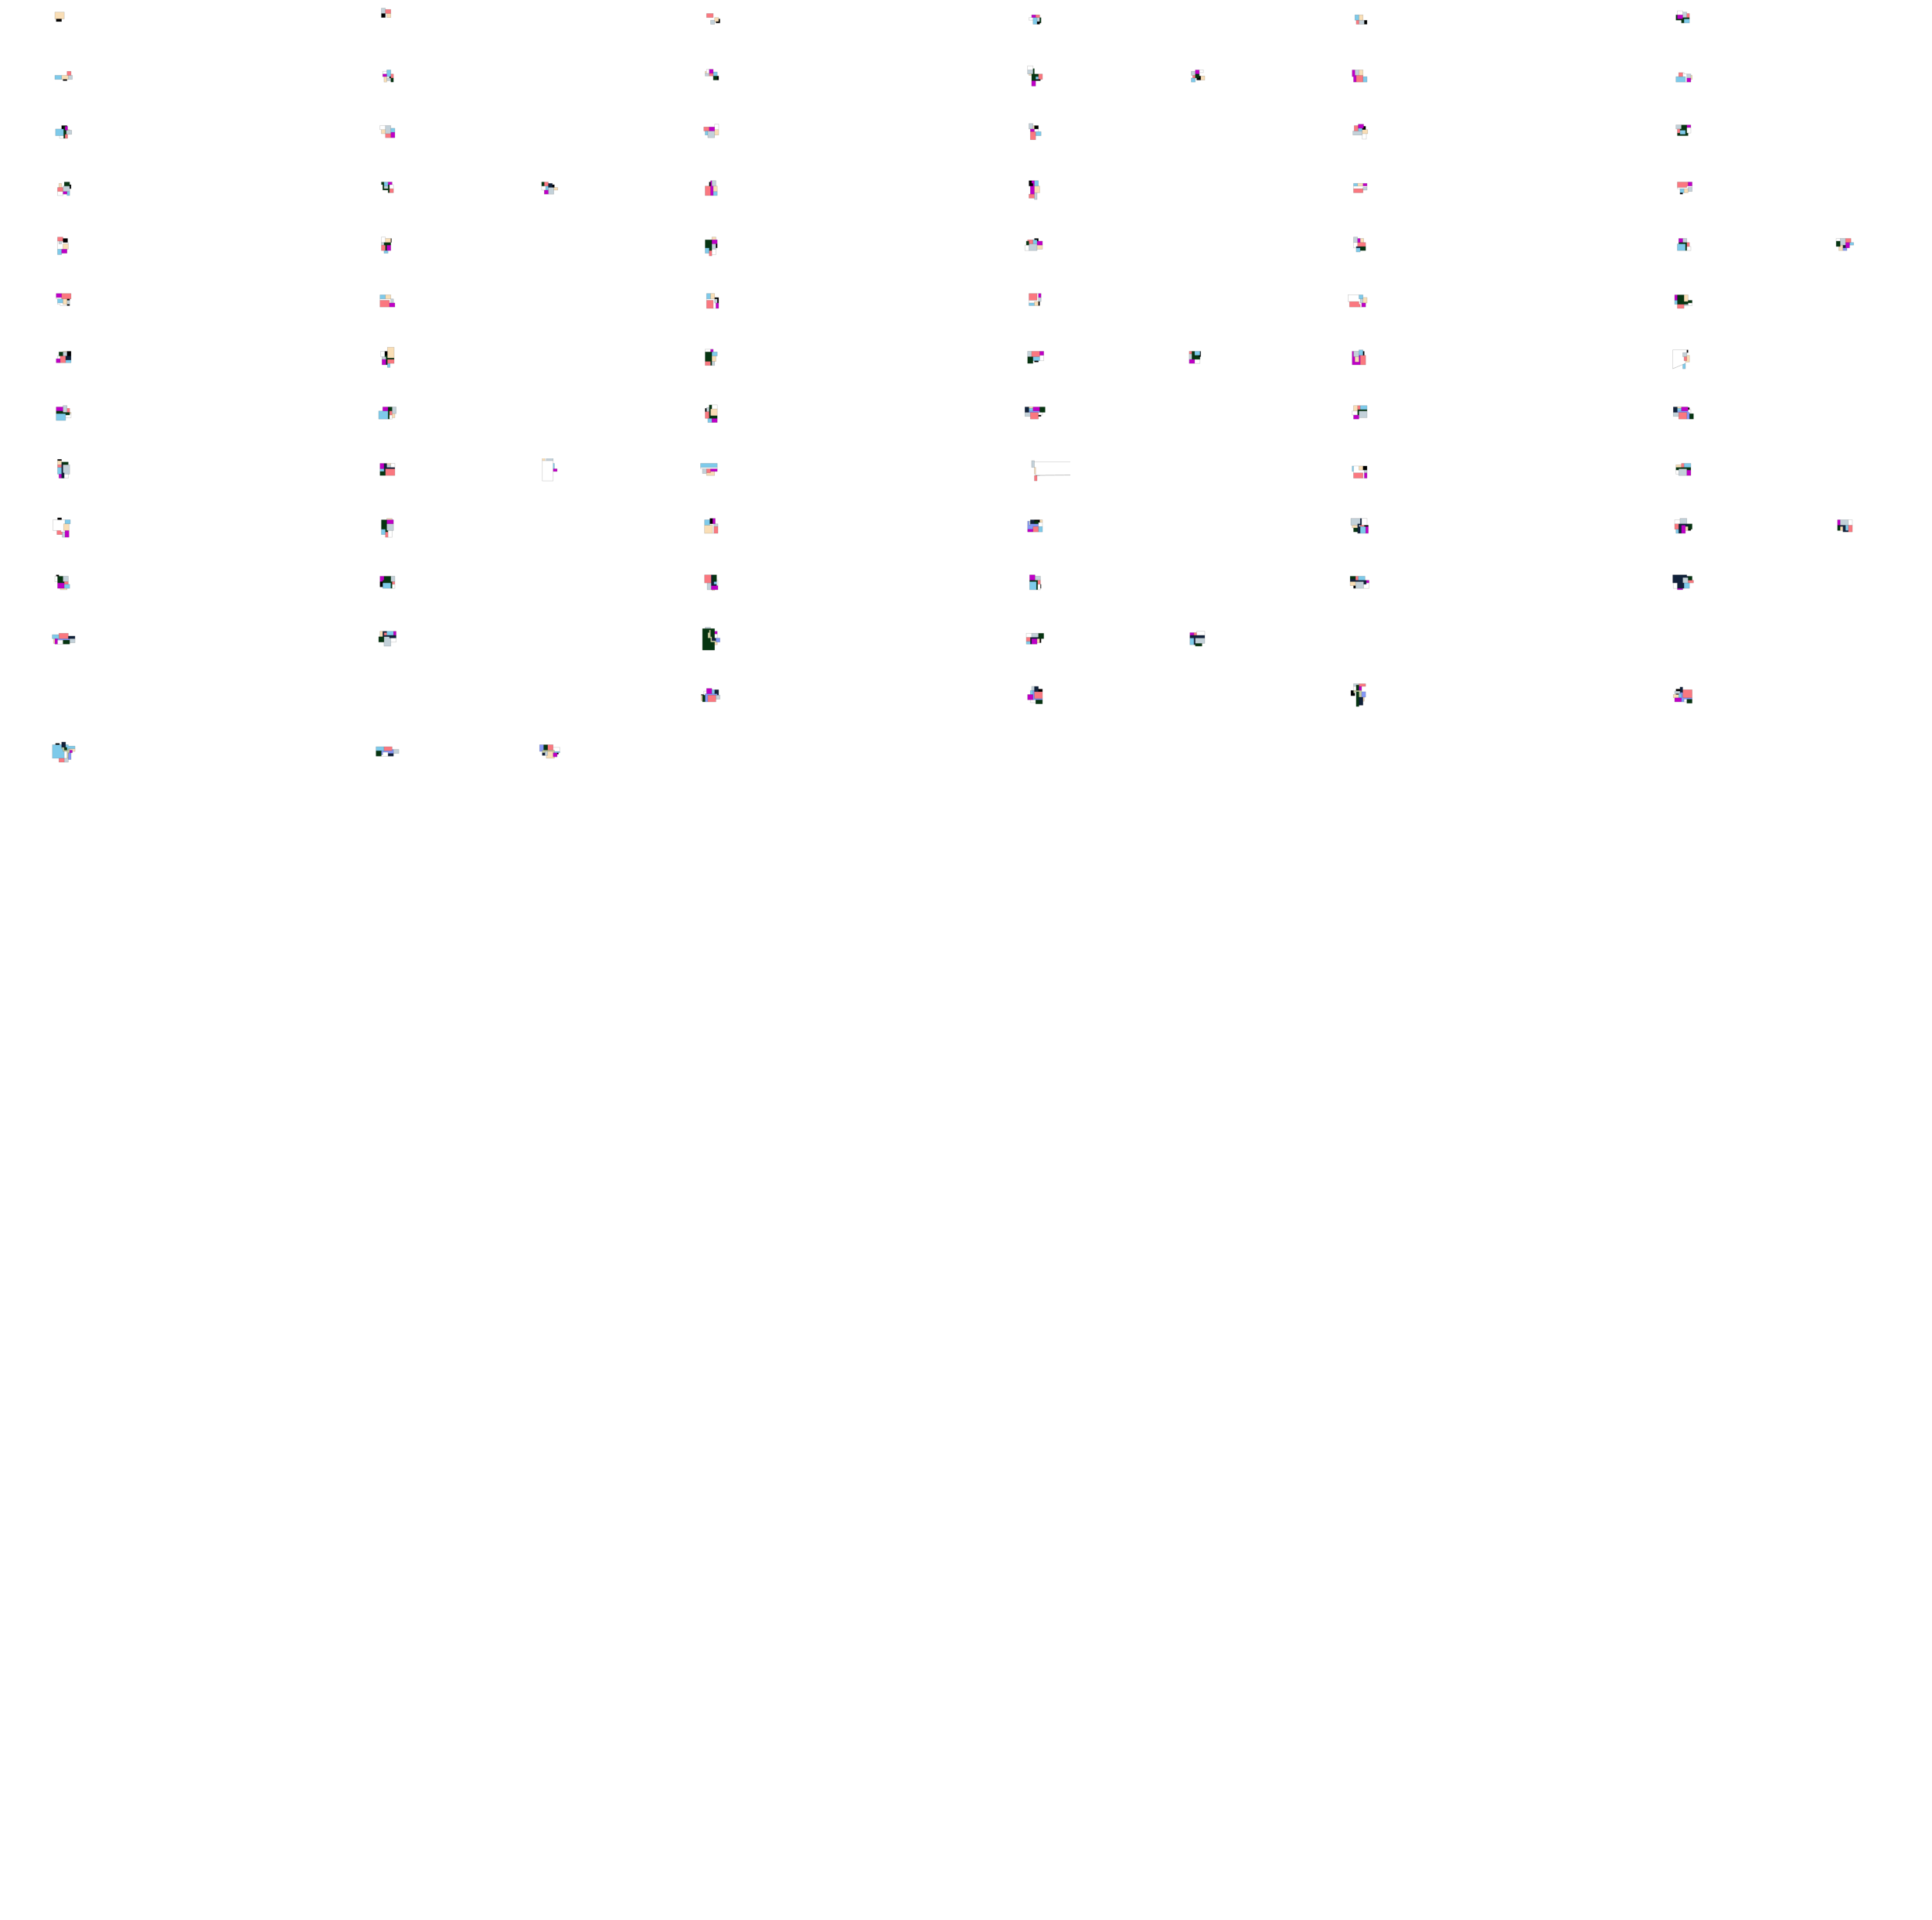

In [30]:
import matplotlib.pyplot as plt

shape = elites.genomes.shape
data = np.ravel(elites.genomes)
columns = 12
rows = len(data) // columns + 1
fig = plt.figure(figsize=(32, 32))
for ind, d in enumerate(data.tolist()):
    fig.add_subplot(rows, columns, ind+1).axis('off')
#fig.savefig('test.png')
    if d!=0:
        plt.imshow(d.get_image())
plt.savefig('test.png')

In [45]:
trajectory = [x[7,0] for x in elites.history]
for x in trajectory:
    if x==0:
        print(0)
    else:
        display(x.get_image())